# Build a deep learning model

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from tensorflow import keras
from tensorflow.keras import layers                       ## conflict with -> from keras import layers

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import RandomizedSearchCV

#from keras.models import Sequential                      ## redundant
# from keras import layers
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.wrappers.scikit_learn import KerasClassifier

/usr/local/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:5

## Loading data

In [9]:
df_ham = pd.read_csv("SPAM text message 20170820 - Data.csv")
df_ham.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
df_ham.shape

(5572, 2)

## Exploratory analysis

#### Discovery 
SPAMs do have patterns like: obvious words (free, winner, urgent etc.), upper-case letters and combination of these with exclamation mark, letter X, misspellings, several digits etc.

In [35]:
df_ham[:25] 

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
5,1,FreeMsg Hey there darling it's been 3 week's n...
6,0,Even my brother is not like to speak with me. ...
7,0,As per your request 'Melle Melle (Oru Minnamin...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...


## Create dummy variable

In [11]:
## replace Category 

dict_trans = {'ham' : 0, 'spam': 1}
df_ham = df_ham.replace({"Category": dict_trans})

df_ham.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


## TfIdf-Vectorizer

### new

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(use_idf=True)               ## 
df_tfidf = vectorizer.fit_transform(df_ham["Message"])   ## .astype('float16')
  

print("training set: ", df_tfidf.shape)
print(type(df_tfidf))


training set:  (5572, 8709)
<class 'scipy.sparse.csr.csr_matrix'>


### old

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(use_idf=True)          ## binary=True
tX_train = vectorizer.fit_transform(tX_train)   ## .astype('float16')
tX_test = vectorizer.fit_transform(tX_test)     ## .astype('float16'), type(tX_test_new) -> scipy.sparse.csr.csr_matrix

print("training set: ", tX_train.shape)
print("test set: ",tX_test.shape)
print(type(tX_train))


AttributeError: lower not found

## Split data

In [13]:
tX_train, tX_test, ty_train, ty_test = train_test_split(df_tfidf, 
                                                    df_ham["Category"], 
                                                    test_size=0.3, 
                                                    random_state=42)

### (In case of transformation into array)

In [ ]:
## transform into array
tX_train_new = tX_train_new.toarray()
print(type(tX_train_new))                        
print(tX_train_new.shape) 

## reshaping matrix
tX_train_new = tX_train_new.reshape((28321800,1))

tX_train_new.shape

### (In case of applying todense( ) )

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(use_idf = True)
#tfidf_vectors_train = tfidf_vectorizer.fit_transform(tX_train)
tfidf_vectors_test = tfidf_vectorizer.fit_transform(tX_test)

#tfidf_vectors_train_dense = tfidf_vectors_train.todense()
tfidf_vectors_test_dense = tfidf_vectors_test.todense()

# tfidf_vectorizer.get_feature_names()
#tX_train = pd.DataFrame(tfidf_vectors_train_dense, columns = tfidf_vectorizer.get_feature_names())
tX_test = pd.DataFrame(tfidf_vectors_test_dense, columns = tfidf_vectorizer.get_feature_names())

print(type(tX_test))
tX_test

## Build model

### normal case (add dropout layer)

In [14]:
## matrix
#input_dim = tX_train_new.shape[1]     ## 1


model = keras.Sequential()
model.add(layers.Dense(64, input_shape=[tX_train.shape[1]], activation='relu')) 
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                557440    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 557,505
Trainable params: 557,505
Non-trainable params: 0
_________________________________________________________________


### in case of array

In [ ]:
## array

model2 = keras.Sequential()
model2.add(layers.Dense(64, input_shape=[tX_train_new.shape[1]], activation='relu')) 
model2.add(layers.Dense(1, activation='sigmoid'))

model2.summary()

### in case of todens( )

In [ ]:
model = keras.Sequential(
    [
        layers.Dense(64, activation="relu", input_shape=[tX_train.shape[1]]),
        layers.Dense(64, activation="relu", name="layer2"),
        layers.Dense(1,)
    ]
)
model.summary()

## Model compilation

### (alternative option)

In [ ]:
from keras.optimizers import RMSprop

model.compile(loss=sLossMetric,
            optimizer=RMSprop(0.001),
            metrics=['accuracy'])

model.summary()

### compile with

In [15]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
model.summary()

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                557440    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 557,505
Trainable params: 557,505
Non-trainable params: 0
_________________________________________________________________


### normal case

In [16]:
history = model.fit(tX_train, ty_train,
                    epochs=100,                            ## 20
                    verbose=True,
                    validation_data=(tX_test, ty_test),    ## validation_data=(tX_test, ty_test) -> see ValueError, validation_split = 0.2
                    batch_size=10)


## ValueError: Error when checking input: expected dense_input to have 
## shape (7262,) but got array with shape (4421,)

Train on 3900 samples, validate on 1672 samples
Epoch 1/100
3900/3900 [==============================] - 2s 554us/sample - loss: 0.2631 - acc: 0.9156 - val_loss: 0.0874 - val_acc: 0.9821
Epoch 2/100
3900/3900 [==============================] - 2s 461us/sample - loss: 0.0505 - acc: 0.9867 - val_loss: 0.0524 - val_acc: 0.9880
Epoch 3/100
3900/3900 [==============================] - 2s 464us/sample - loss: 0.0195 - acc: 0.9956 - val_loss: 0.0458 - val_acc: 0.9886
Epoch 4/100
3900/3900 [==============================] - 2s 461us/sample - loss: 0.0093 - acc: 0.9990 - val_loss: 0.0439 - val_acc: 0.9892
Epoch 5/100
3900/3900 [==============================] - 2s 469us/sample - loss: 0.0053 - acc: 0.9990 - val_loss: 0.0438 - val_acc: 0.9904
Epoch 6/100
3900/3900 [==============================] - 2s 478us/sample - loss: 0.0032 - acc: 0.9997 - val_loss: 0.0460 - val_acc: 0.9910
Epoch 7/100
3900/3900 [==============================] - 2s 497us/sample - loss: 0.0020 - acc: 0.9997 - val_loss: 0.04

Epoch 58/100
3900/3900 [==============================] - 2s 502us/sample - loss: 5.8371e-07 - acc: 1.0000 - val_loss: 0.0964 - val_acc: 0.9892
Epoch 59/100
3900/3900 [==============================] - 2s 510us/sample - loss: 5.0758e-07 - acc: 1.0000 - val_loss: 0.0973 - val_acc: 0.9892
Epoch 60/100
3900/3900 [==============================] - 2s 503us/sample - loss: 4.4874e-07 - acc: 1.0000 - val_loss: 0.0974 - val_acc: 0.9892
Epoch 61/100
3900/3900 [==============================] - 2s 520us/sample - loss: 3.8338e-07 - acc: 1.0000 - val_loss: 0.1000 - val_acc: 0.9880
Epoch 62/100
3900/3900 [==============================] - 2s 513us/sample - loss: 3.3385e-07 - acc: 1.0000 - val_loss: 0.0988 - val_acc: 0.9892
Epoch 63/100
3900/3900 [==============================] - 2s 542us/sample - loss: 2.8532e-07 - acc: 1.0000 - val_loss: 0.1021 - val_acc: 0.9880
Epoch 64/100
3900/3900 [==============================] - 2s 535us/sample - loss: 2.4512e-07 - acc: 1.0000 - val_loss: 0.1024 - val_acc:

### Loss, Accuracy

In [17]:
loss, accuracy = model.evaluate(tX_train, ty_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))

Training Accuracy: 1.0000


In [18]:
## tX_test.shape (1672, 4421), tX_train.shape (3900, 7262)

loss, accuracy = model.evaluate(tX_test, ty_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Testing Accuracy:  0.9874


## Plot model performance

In [20]:
print(history.history.keys())

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


### Accuracy

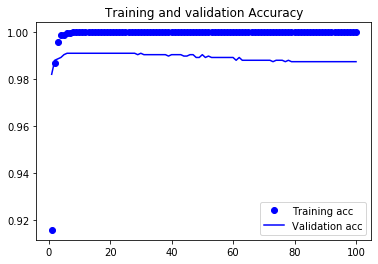

In [30]:
# Plot training performance
import matplotlib.pyplot as plt
%matplotlib inline
acc = history.history['acc']
val_acc = history.history['val_acc']
epochs = range(1, len(mse) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation Accuracy')
plt.legend()
plt.show()

### Interpretation:

Relatively high accuracy because of obvious structure of SPAM mails (text).
After **Epoche 7** accuracy of 1.00.

Problem of **Overfitting**.

VS.

If you see your machine learning algorithm predicting too well, always wonder: am I including any feature duplicating the targets in my input dataset?

### Loss

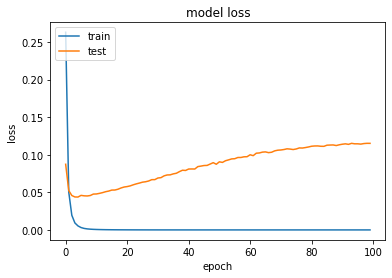

In [31]:
# summarize history for loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Interpretation:

Loss increases after first few epochs.
Overfitting: Low Bias, high Variance...



(...)

In [ ]:
# Make predictions
tX_test = scaler 

test_predictions = model.predict(tX_test).flatten()

a = plt.axes(aspect='equal')
plt.scatter(y_test, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)